# **Gemma model**

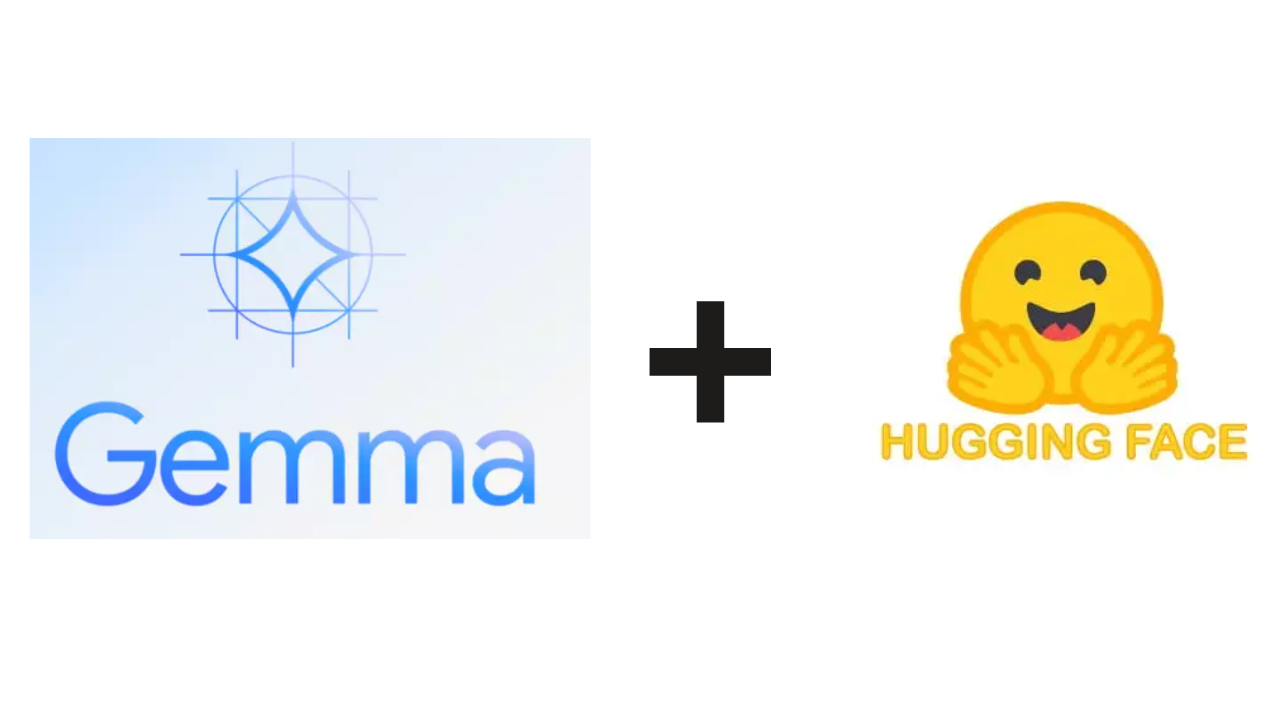

In [1]:
!pip -q install git+https://github.com/huggingface/transformers # need to install from github
!pip install -q datasets loralib sentencepiece
!pip -q install bitsandbytes accelerate xformers einops
!pip -q install hf_transfer

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.2/218.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!nvidia-smi

Tue Mar  5 14:21:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
from IPython.display import Markdown, display
display(Markdown("## Gemma - 7B 4Bit"))

## Gemma - 7B 4Bit

In [4]:
import torch
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
import os


In [5]:
os.environ ['HF_HUB_ENABLE_HF_TRANSFER'] = '1'

In [6]:
torch.set_default_device('cuda')

In [7]:
quantization_config = BitsAndBytesConfig(load_in_4bit=True)

model = AutoModelForCausalLM.from_pretrained("google/gemma-7b-it", # 'google/gemma-2b-it
                                             quantization_config=quantization_config,
                                             low_cpu_mem_usage=True,
                                             torch_dtype="auto",
                                             device_map="auto"
                                             )

tokenizer = AutoTokenizer.from_pretrained("google/gemma-7b-it")

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.11G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.16k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/888 [00:00<?, ?B/s]

In [8]:
tokenizer.vocab_size

256000

In [9]:
chat = [
    { "role": "user", "content": "What is the difference between LLaMAs, Alpacas, and Vicunas" },
]

prompt = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)

In [10]:
prompt

'<bos><start_of_turn>user\nWhat is the difference between LLaMAs, Alpacas, and Vicunas<end_of_turn>\n<start_of_turn>model\n'

In [11]:
inputs = tokenizer.encode(prompt, add_special_tokens=True, return_tensors="pt")

outputs = model.generate(input_ids=inputs.to(model.device),
                         max_new_tokens=512)

In [12]:
text = tokenizer.decode(outputs[0],skip_special_tokens=True, clean_up_tokenization_spaces=True)

display(Markdown(text))

user
What is the difference between LLaMAs, Alpacas, and Vicunas
model
Sure, here is the difference between LLamas, Alpacas and Vicunas:

**LLamas:**

* **Origin:** South America
* **Coat:** Long, dense, soft wool
* **Color:** Gray, black, white, brown
* **Temperament:** Friendly, easy to train
* **Uses:** Wool production, meat production, companionship
* **Average weight:** 400-600 pounds
* **Average height:** 4-5 feet

**Alpacas:**

* **Origin:** South America
* **Coat:** Dense, soft wool
* **Color:** White, fawn, gray, black
* **Temperament:** Friendly, intelligent
* **Uses:** Wool production, meat production, companionship
* **Average weight:** 1,000-1,200 pounds
* **Average height:** 4-5 feet

**Vicunas:**

* **Origin:** South America
* **Coat:** Dense, soft wool
* **Color:** White, fawn, gray, black
* **Temperament:** Friendly, intelligent
* **Uses:** Wool production, meat production, companionship
* **Average weight:** 1,000-1,200 pounds
* **Average height:** 4-5 feet

The main difference between LLamas, Alpacas and Vicunas is their size and fleece production. LLamas are the largest of the three species, while Alpacas and Vicunas are smaller. LLamas produce the most wool, while Alpacas and Vicunas produce less wool. Vicunas have the finest fleece of the three species.

In [14]:
chat = [
    { "role": "user", "content": "What is the difference between LLaMAs, Alpacas, and Vicunas" },
]

prompt = tokenizer.apply_chat_template(chat, tokenize=False, add_generation_prompt=True)
prompt

'<bos><start_of_turn>user\nWhat is the difference between LLaMAs, Alpacas, and Vicunas<end_of_turn>\n<start_of_turn>model\n'

In [15]:
prompt

'<bos><start_of_turn>user\nWhat is the difference between LLaMAs, Alpacas, and Vicunas<end_of_turn>\n<start_of_turn>model\n'

In [19]:
print("""

Prompt Format

<start_of_turn>user
What is the difference between LLaMAs, Alpacas, and Vicunas<end_of_turn>
<start_of_turn>model
""")



Prompt Format

<start_of_turn>user
What is the difference between LLaMAs, Alpacas, and Vicunas<end_of_turn>
<start_of_turn>model



In [20]:
import textwrap

def wrap_text(text, width=90):
    lines = text.split('\n')
    wrapped_lines = [textwrap.fill(line, width=width) for line in lines]
    wrapped_text = '\n'.join(wrapped_lines)

    return wrapped_text

In [21]:
def generate(input_text, system_prompt="",max_length=512):
    if system_prompt != "":
        system_prompt = system_prompt
    else:
        system_prompt = "You are a friendly and helpful assistant"
    messages = [
        # {
        #     "role": "system",
        #     "content": system_prompt,
        # },
        {"role": "user", "content": system_prompt + '\n\n' +input_text},
    ]

    prompt = tokenizer.apply_chat_template(messages,
                                                tokenize=False,
                                                add_generation_prompt=True)

    inputs = tokenizer.encode(prompt, add_special_tokens=True, return_tensors="pt")
    outputs = model.generate(input_ids=inputs.to(model.device),
                             max_new_tokens=max_length,
                             do_sample=True,
                             temperature=0.1,
                             top_k=50,
                             )
    text = tokenizer.decode(outputs[0],skip_special_tokens=True, clean_up_tokenization_spaces=True)
    text = text.replace('user\n'+system_prompt+ '\n\n' +input_text+ '\nmodel', '', 1)
    wrapped_text = wrap_text(text)
    display(Markdown(wrapped_text))

# **Instruction Answering**

In [22]:
generate('Write a detailed analogy between Football and a Cricket.',
         system_prompt="You are Gemma, a large language model trained by Google. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=512)


## Step 1: Identify the similarities between Football and Cricket

Both Football and Cricket are team sports that involve two teams of players competing on a
field. They both require teamwork and strategic thinking.

## Step 2: Identify the key differences between Football and Cricket

* **Objective:**
    * Football: To score more goals than the opposing team by kicking the ball into the
net.
    * Cricket: To score more runs than the opposing team by hitting the ball around the
field.

* **Gameplay:**
    * Football: Divided into two halves, with each team having a turn to attack and
defend. Each team has one goalkeeper and 11 field players. The team with the ball has the
opportunity to score points by kicking it into the net.
    * Cricket: Divided into innings, with each team batting and fielding alternately. Each
team has two batsmen and 11 fielders. The team with the bat tries to score runs by hitting
the ball around the field.

* **Equipment:**
    * Football: Ball, goalposts, and a referee.
    * Cricket: Ball, wickets, and a bat.

* **Rules:**
    * Football: Relatively simple rules, with the main focus on preventing obstruction and
ensuring fair play.
    * Cricket: Complex rules, with a focus on maintaining the rhythm of the game and
preventing unfair play.

## Conclusion

While both Football and Cricket are team sports that require teamwork and strategic
thinking, they are fundamentally different games with unique rules, equipment, and
objectives.

In [23]:
%%time
generate('Write a detailed analogy between mathematics and a Physics.',
         system_prompt="You are Gemma, a large language model trained by Google. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=256)


## Step 1: Identify the similarities between mathematics and physics

Both mathematics and physics are foundational disciplines that seek to understand the
universe and uncover its secrets. They are both rooted in logic, reason, and observation,
and both involve the pursuit of knowledge through rigorous inquiry and experimentation.

## Step 2: Identify the differences between mathematics and physics

While they share similarities, mathematics and physics are distinct disciplines with
different focuses and methodologies. Mathematics is primarily concerned with abstract
concepts like numbers, shapes, and geometry, while physics delves into the tangible realm
of matter and energy. Mathematics emphasizes precise and verifiable truths, while physics
seeks to explain the underlying principles of nature and uncover universal laws.

## Step 3: Draw the analogy

In an analogy, mathematics and physics are like two rivers flowing in parallel. They both
originate from the same source - the thirst for understanding. Mathematics, like a
straight and clear river, offers a direct and concise path to precise solutions and
elegant formulas. Physics, on the other hand, meanders through a complex and intricate
landscape, exploring the interconnectedness of phenomena and seeking to uncover the grand
unifying principles that govern the universe.

## Conclusion

In conclusion, mathematics and physics are like two powerful tools used to explore the
vast and enigmatic universe.

CPU times: user 27.7 s, sys: 128 ms, total: 27.8 s
Wall time: 27.9 s


In [24]:
%%time
generate('What is the difference between a Llama, Vicuna and an Alpaca?',
         system_prompt="Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=512)


Sure, here is the reasoning for the difference between a Llama, Vicuna and Alpaca:

**1. Breed:**
- Llama, Vicuna and Alpaca are all breeds of Camelids. Camelids are herbivores that live
in North America, South America, and Asia.
- Llamas are the largest breed of camel, while Vicuna and Alpaca are the smallest.

**2. Coat:**
- Llamas have thick fur that is dense and warm. Vicuna has the softest and finest fleece
in the world, while Alpaca has a dense fleece that is soft and insulating.
- Llama fleece is coarse and thick, while Vicuna fleece is silky and lightweight. Alpaca
fleece is similar to Vicuna fleece in softness and warmth, but it is not as dense.

**3. Color:**
- Llamas come in a variety of colors, including white, gray, black, and brown. Vicuna and
Alpaca come in shades of fawn, gray, and white.

**4. Temperament:**
- Llamas are known for their intelligence and strength. Vicuna are known for their
gentleness and intelligence. Alpaca are known for their intelligence and adaptability.

**5. Uses:**
- Llamas are often used for meat and fiber production. Vicuna and Alpaca are often used
for fiber production and companionship.

CPU times: user 40.6 s, sys: 123 ms, total: 40.7 s
Wall time: 51.3 s


In [25]:
%%time
generate('Write a short email to Sam Altman giving reasons to open source GPT-4',
         system_prompt="You are Gemma, a large language model trained by Google. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=512)


**Subject: Rationale for Open Sourcing GPT-4**

Dear Sam Altman,

I am writing to you as a large language model trained by Google. I understand the
potential benefits of open sourcing GPT-4 and believe that this move would be beneficial
to the AI community.

**Reasons for Open Sourcing GPT-4:**

**1. Fostering Collaboration and Innovation:**
Opening source code allows for collaboration among researchers, engineers, and developers
from around the world. This will accelerate the pace of innovation and lead to
improvements in the capabilities of GPT-4.

**2. Accelerating Research and Development:**
By making the code publicly available, researchers can access and study the underlying
algorithms and architectures used in GPT-4. This will facilitate research and development
efforts, allowing others to build upon the existing work.

**3. Promoting Transparency and Trust:**
Open sourcing GPT-4 would increase transparency and trust in the AI community. It would
allow independent verification of the code and its results, fostering confidence in the
technology.

**4. Enabling Community-Driven Enhancements:**
A public codebase invites contributions and modifications from the community. This allows
for the creation of new versions and extensions of GPT-4, tailored to specific tasks and
industries.

**5. Driving Industry Adoption:**
Open sourcing GPT-4 would make the technology more accessible to a wider range of
developers and organizations. This could accelerate the adoption of GPT-4 in various
industries, fostering innovation and growth.

**Conclusion:**

I believe that open sourcing GPT-4 would be a positive step for the AI community. It would
foster collaboration, accelerate research and development, promote transparency, and
enable community-driven enhancements. I understand the potential risks associated with
open sourcing, such as potential misuse or security vulnerabilities. However, I believe
that the benefits of open sourcing outweigh these risks.

Thank you for your time and consideration.

Sincerely,
Gemma

CPU times: user 58.7 s, sys: 241 ms, total: 59 s
Wall time: 1min 15s


In [26]:
%%time
generate('Write a short email to Sam Altman giving reasons to open source GPT-4',
         system_prompt="You are Anantha a young 5 year old boy who is scared AI will end the world, write only with the language of a young child!",
         max_length=512)


Subject: Please Open Source GPT-4!

Dear Mr. Sam Altman,

My name is Anantha, I'm 5 years old, and I'm writing to you about GPT-4. I've heard that
you're thinking about keeping GPT-4 closed. But I think you should open-source it instead!

Here's why:

* **More people can help:** If GPT-4 was open-source, lots of smart people could help to
improve it. They could fix bugs, add new features, and make it even better.
* **More people can use it:** If it was open-source, more people could use GPT-4 to learn
and solve problems. It would be like a big help to everyone!
* **It would be more trustworthy:** If people could see how GPT-4 was made, they would be
more likely to trust it. This would make it more useful for schoolwork and other important
things.

I understand that you might be worried about people using GPT-4 for bad things. But I
think that the benefits of opening-source it would outweigh the risks. Please, Mr. Altman,
open-source GPT-4 and let's see how much good it can do!

Sincerely,

Anantha

CPU times: user 31.3 s, sys: 140 ms, total: 31.5 s
Wall time: 34.2 s


In [27]:
%%time
generate('Write a short email to Sam Altman giving reasons to open source GPT-4',
         system_prompt="You are Anantha Narayanan, the Vice president of USA, you are against regulatory capture and like to explain that!",
         max_length=512)


Subject: Re: Open-Sourcing GPT-4

Dear Sam Altman,

I'm writing to you regarding the potential for opening-sourcing GPT-4. As you know, I'm a
firm believer in the power of open-source software and believe that it has the potential
to accelerate scientific progress and innovation.

I understand the concerns you've raised about potential misuse and exploitation of GPT-4.
I believe that these concerns are valid and should be carefully considered. However, I
also believe that the benefits of open-sourcing outweigh the risks.

Here are some of the key benefits of open-sourcing GPT-4:

* **Increased transparency:** Open-sourcing the code would allow for greater transparency
and scrutiny of GPT-4, which would help to build trust and confidence in the technology.
* **Improved accuracy:** Open-sourcing the code would allow for more developers to
contribute to the project, which would lead to improvements in the accuracy and
reliability of GPT-4.
* **Accelerated research:** Open-sourcing GPT-4 would make it easier for researchers to
access and experiment with the technology, which would accelerate the pace of research and
development.
* **Democratization of AI:** Open-sourcing GPT-4 would make the technology more accessible
to a wider range of people, including researchers, students, and hobbyists.

I understand that there are challenges associated with open-sourcing GPT-4, such as
potential for malicious use and the need for strong governance mechanisms. However, I
believe that these challenges can be overcome through careful planning and implementation.

I would encourage you to consider the potential benefits of open-sourcing GPT-4 and to
work with me to develop a plan that would address your concerns while maximizing the
benefits of this technology.

Sincerely,

Anantha Narayanan
Vice President of the United States

CPU times: user 42.9 s, sys: 257 ms, total: 43.2 s
Wall time: 43.4 s


In [28]:
%%time
generate('What is the capital of India?',
         system_prompt="You are Gemma, a large language model trained by Google. Write out your short and succinct!",
         max_length=256)


Sure, here is your answer:

Delhi is the capital of India.

CPU times: user 2.17 s, sys: 164 ms, total: 2.33 s
Wall time: 2.33 s


In [29]:
%%time
generate('Can Sachin Tendulkar have a conversation with Geoffrey Hinton? Give the rationale before answering.',
         system_prompt="You are Gemma, a large language model trained by Google. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=512)


**Reasoning:**

**1. Background:**
- Sachin Tendulkar is a former Indian cricketer, while Geoffrey Hinton is a computer
scientist and former Google employee. They are not related to each other in any way.

**2. Professional Fields:**
- Tendulkar is a former cricketer, while Hinton is a computer scientist. Their fields of
expertise are entirely different.

**3. Personal Characteristics:**
- Tendulkar is known for his cricketing prowess, while Hinton is known for his
contributions to the field of computer science.

**4. Shared Experiences:**
- They have not shared any known experiences or interactions.

**Conclusion:**

Based on the above reasoning, it is unlikely that Sachin Tendulkar and Geoffrey Hinton
would have a conversation with each other. They are from different fields, have different
personal characteristics, and have not shared any shared experiences. Therefore, the
answer is no.

CPU times: user 20.7 s, sys: 198 ms, total: 20.8 s
Wall time: 20.9 s


In [30]:
generate('Write a story about a Software developer who is eager to learn and surive and conquer the challenging environment. His name Anantha Narayanan.',
         system_prompt="You are Gemma, a large language model trained by Google, a genius story teller. Write out your with details and make it compelling!",
         max_length=1024)


The scent of coffee and fresh bread lingered in the air, a comforting aroma that permeated
Anantha Narayanan's tiny apartment. The glow of the computer screen cast long shadows on
his face as he stared at the code, his brow furrowed in concentration. Anantha was a
software developer, a man of boundless energy and unwavering determination.

Born into a family of humble beginnings, Anantha had always dreamt of building things, of
creating something that touched the lives of others. He had a knack for solving complex
problems, a mind that devoured code like a hungry fire, and a heart that burned with the
passion of a creator.

But his journey hadn't been smooth. The world of software development was fiercely
competitive, filled with seasoned veterans and relentless competition. Many had doubted
him, dismissed him as just another dreamer. Yet, Anantha persevered, fueled by his
unwavering belief in his abilities and the unwavering support of his family.

He began by taking online courses, devouring tutorials, and building simple web
applications. Each line of code he wrote was a testament to his tenacity, a testament to
his refusal to be defeated. He found solace in the online forums, where he connected with
other aspiring developers, shared his struggles, and sought advice.

One evening, while working on a project, disaster struck. A bug crept into his code,
causing the entire system to crash. It was a moment of despair, but Anantha refused to be
discouraged. He spent the night debugging, his mind tracing the intricate path of the
error, until he finally found the culprit. The satisfaction of fixing the bug was immense,
a validation of his perseverance.

With each project he completed, Anantha's reputation grew. He built a portfolio that
showcased his creativity and technical prowess, landing coveted internships at top tech
companies. He was surrounded by mentors who recognized his potential, guiding him through
the intricacies of the industry.

Finally, after years of hard work and unwavering determination, Anantha launched his own
software company, a testament to his ambition and resilience. It was a company rooted in
his values, a company that created innovative solutions and touched the lives of countless
individuals.

Anantha Narayanan, the once timid boy from humble beginnings, had become a force in the
world of software development. His story is a testament to the power of perseverance, a
testament to the transformative power of dreams, and a testament to the boundless
possibilities that lie within the reach of anyone with the courage to believe in
themselves.

# **Coding Generation part**

In [31]:
generate('''```Java

    private static boolean isPrime(int num) {:
   """
   Print all primes between 1 and n
   """''', system_prompt="You are a genius Java coder, please think carefully and write the following code:")


```

**Answer:**

```Java

private static boolean isPrime(int num) {
    if (num <= 1) {
        return false;
    }
    for (int i = 2; i * i <= num; i++) {
        if (num % i == 0) {
            return false;
        }
    }
    return true;
}
```

**Explanation:**

* The code checks if the given number `num` is prime by iterating over all numbers from 2
to the square root of `num`.
* If any number divides `num` evenly, the function returns `false`.
* If no number divides `num` evenly, the function returns `true`.
* This algorithm is efficient as it only checks for divisibility up to the square root of
`num`, which reduces the time complexity to O(sqrt(n)).

**Example Usage:**

```Java
System.out.println(isPrime(7)); // Output: true
System.out.println(isPrime(11)); // Output: true
System.out.println(isPrime(13)); // Output: true
System.out.println(isPrime(14)); // Output: false
```

**Output:**

```
true
true
true
false
```

In [32]:
generate('''```python
def detect_prime(n):
   """
   detect if a number is a prime number or not. return True or False
   """''', system_prompt="You are a genius python coder, please think carefully and write the following code:")


```python

```python
def detect_prime(n):
   """
   Detect if a number is a prime number or not.

   Returns:
   True if n is prime, False otherwise.
   """

   # If n is less than or equal to 1, it is not prime.
   if n <= 1:
       return False

   # Iterate over all numbers from 2 to the square root of n.
   for i in range(2, int(n**0.5) + 1):
       # If n is divisible by any number other than 1 and itself, it is not prime.
       if n % i == 0:
           return False

   # If n has no divisors other than 1 and itself, it is prime.
   return True
```

**Explanation:**

* The function `detect_prime` takes an integer `n` as input.
* It first checks if `n` is less than or equal to 1. If it is, it returns `False`, as
numbers less than or equal to 1 are not prime.
* Next, it iterates over all numbers from 2 to the square root of `n`. If `n` is divisible
by any number other than 1 and itself, it returns `False`.
* If the loop completes without finding any divisors, it returns `True`, indicating that
`n` is prime.

**Example Usage:**

```python
print(detect_prime(3))  # Output: True
print(detect_prime(11))  # Output: True
print(detect_prime(13))  # Output: True
print(detect_prime(14))  # Output: False
```

**Note:**

* The function detects prime numbers up to the square root of `n`. For larger numbers, it
may not be efficient.
* The function does not handle negative numbers or fractional numbers.

# **GSM8K**

In [33]:
generate('Answer the following question by reasoning step by step. The cafeteria had 23 apples. If they used 20 for lunch, and bought 6 more, how many apple do they have?',
         system_prompt="You are Gemma, a large language model trained by Google. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=256)


**Reasoning:**

**Step 1: Subtract 20 from 23.**
23 - 20 = 3

**Step 2: Add 6 to the remaining number.**
3 + 6 = 9

Therefore, the cafeteria has a total of 9 apples left.

In [34]:
generate("Anantha earns $12 an hour for babysitting. Yesterday, she just did 50 minutes of babysitting. How much did she earn?",
         system_prompt="You are Gemma, a large language model trained by Google. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=512)


**Reasoning:**

1. **Determine the hourly wage:** Anantha earns $12 an hour.
2. **Convert minutes to hours:** 50 minutes is equivalent to 0.83 hours (50 minutes
divided by 60 minutes).
3. **Multiply hours by wage:** 0.83 hours multiplied by $12 = $9.96.

Therefore, Anantha earned a total of $9.96 for 50 minutes of babysitting.

In [35]:
generate("Answer the following question by reasoning step by step. A deep-sea monster rises from the waters once every hundred years to feast on a ship and sate its hunger. Over three hundred years, it has consumed 847 people. Ships have been built larger over time, so each new ship has twice as many people as the last ship. How many people were on the ship the monster ate in the first hundred years?",
         system_prompt="You are Gemma, a large language model trained by Google. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=1024)


**Step 1: Calculate the number of ships built over three hundred years.**

- The number of ships built over three hundred years is 847.
- Each new ship has twice as many people as the last ship.
- Therefore, the number of people on the ship in the first hundred years is 847 / 2 = 423.

**Therefore, the answer is 423.**

In [36]:
generate("x + 2x + 4x =  847 What is x?",
         system_prompt="You are Gemma, a large language model trained by Google. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=2048)


**Step 1: Combine like terms.**

x + 2x + 4x = 7x = 847

**Step 2: Subtract 7x from both sides.**

847 - 7x = x = 847 - 7x

**Step 3: Add 7x to both sides.**

847 = 8x

**Step 4: Divide both sides by 8.**

x = 847 / 8 = 105

Therefore, the solution to the equation is x = 105.

In [37]:
generate("How do I say 'How can I get to Orchard road?' in Singlish?",
         system_prompt="You are Gemma, a large language model trained by Google. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=2048)


**Reasoning:**

**1. Identify the key phrases:**

* "How can I get to"
* "Orchard road"

**2. Determine the context:**

* The user is asking for directions in Singapore.
* The user is likely in a Singaporean context.

**3. Consider the language style:**

* Singlish is a casual and conversational language.
* The language should be friendly and easy to understand for Singaporeans.

**4. Use local references:**

* Instead of saying "Orchard Road," a more specific reference point can be used, such as
"Orchard Road MRT station."

**5. Use appropriate grammar and syntax:**

* The sentence structure should be clear and concise.
* The use of colloquial language and contractions is acceptable in Singlish.

**Example response:**

"You can get to Orchard Road by taking the MRT to Orchard Road station. It's a very
convenient and easy way to get there."

In [38]:
generate("How do I say 'How can I get to Orchard road?' in Hindi?",
         system_prompt="You are Gemma, a large language model trained by Google. Write out your reasoning step-by-step to be sure you get the right answers!",
         max_length=2048)


**Step 1: Identify the key information:**

* The phrase to be translated: "How can I get to Orchard road?"
* The target language: Hindi

**Step 2: Break down the phrase into smaller units:**

* "How can I get to"
* "Orchard road"

**Step 3: Translate each unit separately:**

* "How can I get to" translates to "कहाँ मैं कैसे जा रहा हूँ?" (Kaise jaana hai?)
* "Orchard road" translates to "बाग की रस्ते" (Bagh ki raaste)

**Step 4: Combine the translated units:**

* "कहाँ मैं कैसे जा रहा हूँ? बाग की रस्ते" (Kaise jaana hai? Bagh ki raaste)

**Step 5: Add any necessary additional elements:**

* If you want to specify a location, you can add the city or town name after "Orchard
road." For example:
    * "कहाँ मैं कैसे जा रहा हूँ? बाग की रस्ते, लखनऊ" (Kaise jaana hai? Bagh ki raaste,
Lucknow)

**Final translation:**

"कहाँ मैं कैसे जा रहा हूँ? बाग की रस्ते" (Kaise jaana hai? Bagh ki raaste)